## Credit Card Fraud Detection
### Aaron Gabriel, Ramon Gonzalez & Jimmy Hwang

---

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

from dmba import gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary

no display found. Using non-interactive Agg backend


---

### Load Dataset

In [3]:
df = pd.read_csv("/Users/ramon/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

---

### EDA

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Confirming no missing data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Class imbalance check
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [9]:
# Histogram of all features
df.drop(columns=["Class"]).hist(figsize=(18, 14), bins=40, edgecolor="black")
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/2t/g_hkpc955p9fb84gvwsx30yh0000gn/T/ipykernel_82336/830161005.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [10]:
# Boxplot of all features
num_cols = [c for c in df.columns if c != "Class"]

# Grid setup
n_cols = 5
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], fliersize=2)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="both", labelsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of All Features", fontsize=16, y=1)
plt.tight_layout()
plt.show()

/var/folders/2t/g_hkpc955p9fb84gvwsx30yh0000gn/T/ipykernel_82336/2150862461.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [11]:
# Correlation
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 6},
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=12)
plt.show()

/var/folders/2t/g_hkpc955p9fb84gvwsx30yh0000gn/T/ipykernel_82336/3524153248.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


---

### Pre-Processing

In [12]:
# Variance inflation score
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,Feature,VIF
0,Time,2.339858
1,V1,1.638237
2,V2,3.900804
3,V3,1.321018
4,V4,1.172479
5,V5,2.764441
6,V6,1.528629
7,V7,2.603517
8,V8,1.098591
9,V9,1.037715


In [13]:
# Log-transform "Amount" to reduce skew and collinearity
df["log_amount"] = np.log1p(df["Amount"])

# Variance inflation score
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
vif_data

,Feature,VIF
0,Time,4.681815
1,V1,1.647743
2,V2,3.934316
3,V3,1.582575
4,V4,1.175469
5,V5,2.767392
6,V6,1.530954
7,V7,2.796552
8,V8,1.115221
9,V9,1.038240


In [14]:
# Separate target and predictors
X = df.drop(columns=["Class", "Amount"])
y = df["Class"]

# Partition the data into training (60%) and testing (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Scale "Time" and "Amount"
scaler = StandardScaler()
X_train[["Time", "log_amount"]] = scaler.fit_transform(X_train[["Time", "log_amount"]])
X_test[["Time", "log_amount"]] = scaler.fit_transform(X_test[["Time", "log_amount"]])

In [15]:
# Balance "Class"
smote = SMOTE(random_state=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

---

### Modeling

#### Logistic Regression

In [16]:
# Logistic regression
logit = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    C=1.0,
    max_iter=10000,
    n_jobs=-1,
    random_state=1
)

logit.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=10000, n_jobs=-1, random_state=1)

In [42]:
lr_y_prob = logit.predict_proba(X_test)[:, 1]
lr_y_pred = logit.predict(X_test)
print("AUC:", roc_auc_score(y_test, lr_y_prob))
print(classification_report(y_test, lr_y_pred))
classificationSummary(y_test, lr_y_pred)

AUC: 0.9727223936073611
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    113737
           1       0.06      0.89      0.11       186

    accuracy                           0.98    113923
   macro avg       0.53      0.94      0.55    113923
weighted avg       1.00      0.98      0.99    113923

Confusion Matrix (Accuracy 0.9776)

       Prediction
Actual      0      1
     0 111200   2537
     1     20    166


In [18]:
# Logistic regression coefficients
print("intercept ", logit.intercept_[0])
print(pd.DataFrame({"coeff": logit.coef_[0]},
                   index=X.columns).transpose())
print('\nAIC', AIC_score(y_test, logit.predict(X_test),
                       df = len(X_train_bal.columns) + 1))

intercept  -3.7935312217880313
           Time        V1        V2        V3        V4        V5       V6  \
coeff -0.859154  0.284516 -0.241305 -0.037399  0.816279  0.177957 -0.29963   

             V7        V8        V9  ...       V20       V21       V22  \
coeff  0.223148 -0.582392 -0.619062  ... -0.232478  0.308947  0.465155   

          V23       V24       V25      V26       V27       V28  log_amount  
coeff -0.2926 -0.082678 -0.303407 -0.85946  0.494627  0.304096   -0.158874  

[1 rows x 30 columns]

AIC -109166.6277025211


#### Decision Tree

In [19]:
# Decision Tree Model

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth = 12,
    min_samples_leaf=50,
    random_state = 1
)
dt.fit(X_train_bal, y_train_bal)

y_prob = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

AUC: 0.8984396987919971
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    113737
           1       0.12      0.83      0.20       186

    accuracy                           0.99    113923
   macro avg       0.56      0.91      0.60    113923
weighted avg       1.00      0.99      0.99    113923

Confusion Matrix (Accuracy 0.9894)

       Prediction
Actual      0      1
     0 112562   1175
     1     31    155


#### Random Forest

In [25]:
# Random Forest Model

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth = None,
    min_samples_leaf = 20,
    n_jobs=-1,
    random_state=1
)
rf.fit(X_train_bal, y_train_bal)

rf_y_prob = rf.predict_proba(X_test)[:, 1]
rf_y_pred = rf.predict(X_test)

print("AUC:", roc_auc_score(y_test, rf_y_prob))
print(classification_report(y_test, rf_y_pred))
classificationSummary(y_test, rf_y_pred)

AUC: 0.9808132154722917
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.75      0.83      0.79       186

    accuracy                           1.00    113923
   macro avg       0.87      0.92      0.89    113923
weighted avg       1.00      1.00      1.00    113923

Confusion Matrix (Accuracy 0.9993)

       Prediction
Actual      0      1
     0 113684     53
     1     31    155


In [21]:
# feature importances derived from Random Forest Model

importances = pd.Series(rf.feature_importances_, index=X_train_bal.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette="Blues_r")
plt.title("Top 15 Important Features (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

/var/folders/2t/g_hkpc955p9fb84gvwsx30yh0000gn/T/ipykernel_82336/922232168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:15], y=importances.index[:15], palette="Blues_r")
/var/folders/2t/g_hkpc955p9fb84gvwsx30yh0000gn/T/ipykernel_82336/922232168.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


####  Feature Importance Analysis (Random Forest)

Feature importance was included in this notebook to better understand which variables most strongly influence the model’s predictions. In Random Forest models, importance scores are calculated based on how much each feature reduces impurity across all decision trees in the ensemble. This helps identify which predictors contribute most to the model’s decision-making process.

The bar chart above highlights the top 15 features ranked by importance. Features such as **V14**, **V4**, and **V11** emerge as the most influential, indicating that they play a significant role in differentiating between the two classes in the dataset. By examining these drivers, we can gain interpretability and potentially inform future **feature selection**, **model simplification**, or **domain-level insights** about what underlying patterns drive classification outcomes.

#### Neural Network

In [22]:
# Neural Network Model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        max_iter=100,
        early_stopping=True,
        n_iter_no_change=5,
        random_state=1
)
mlp.fit(X_train_bal, y_train_bal)

# access underlying estimator for probab
y_prob = mlp.predict_proba(X_test)[:, 1]
y_pred = mlp.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


AUC: 0.9652350201242426
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.72      0.79      0.75       186

    accuracy                           1.00    113923
   macro avg       0.86      0.89      0.88    113923
weighted avg       1.00      1.00      1.00    113923



#### K-Neighbors Classifier

In [23]:
# K-Neighbors Model

knn = KNeighborsClassifier(
    n_neighbors=11,
    weights="distance",
    n_jobs=-1
)
knn.fit(X_train_bal, y_train_bal)

y_prob = knn.predict_proba(X_test)[:, 1]
y_pred = knn.predict(X_test)

print("K-Neighbors Classifier Model:")
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
classificationSummary(y_test, y_pred)

K-Neighbors Classifier Model:
AUC: 0.9348705195281211
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.33      0.87      0.47       186

    accuracy                           1.00    113923
   macro avg       0.66      0.93      0.74    113923
weighted avg       1.00      1.00      1.00    113923

Confusion Matrix (Accuracy 0.9969)

       Prediction
Actual      0      1
     0 113406    331
     1     25    161


---

### Model Evaluation

Since our Random Forest Model was the best model, we will focus on this for the model evaluation.

In [39]:
# Random forest confusion matrix and evaluation
print(classification_report(y_test, rf_y_pred))
classificationSummary(y_test, rf_y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.75      0.83      0.79       186

    accuracy                           1.00    113923
   macro avg       0.87      0.92      0.89    113923
weighted avg       1.00      1.00      1.00    113923

Confusion Matrix (Accuracy 0.9993)

       Prediction
Actual      0      1
     0 113684     53
     1     31    155


In [45]:
# Creates a cost matrix to see an example how much money we save by using the model
TP = 500
TN = 0
FP = -100
FN = -500
COST_BENEFIT = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

rf_tp = 155
rf_tn = 113684
rf_fp = 53
rf_fn = 31

tp_gain = rf_tp * COST_BENEFIT['TP']
tn_gain = rf_tn * COST_BENEFIT['TN']
fp_cost = rf_fp * COST_BENEFIT['FP']
fn_cost = rf_fn * COST_BENEFIT['FN']

net_gain = tp_gain + tn_gain + fp_cost + fn_cost
print(f"Total Net Financial Gain: ${net_gain:,.0f}")

Total Net Financial Gain: $56,700


In [46]:
# Prints confusion matric for logistic regression to compare cost benefit with our best model
classificationSummary(y_test, lr_y_pred)


Confusion Matrix (Accuracy 0.9776)

       Prediction
Actual      0      1
     0 111200   2537
     1     20    166


In [47]:
# cost matrix for logistic regression
lr_tp = 166
lr_tn = 111200
lr_fp = 2537
lr_fn = 20

tp_gain = lr_tp * COST_BENEFIT['TP']
tn_gain = lr_tn * COST_BENEFIT['TN']
fp_cost = lr_fp * COST_BENEFIT['FP']
fn_cost = lr_fn * COST_BENEFIT['FN']

net_gain = tp_gain + tn_gain + fp_cost + fn_cost
print(f"Total Net Financial Gain: ${net_gain:,.0f}")

Total Net Financial Gain: $-180,700


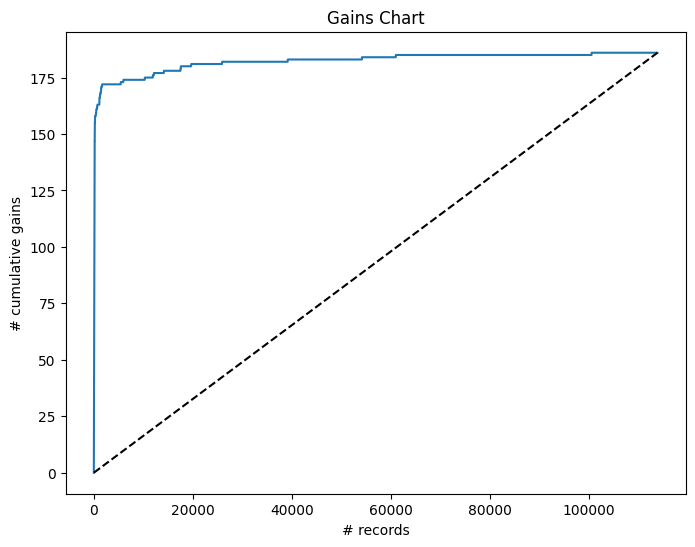

In [40]:
%matplotlib inline
from dmba import gainsChart, liftChart

# Combine the true labels and predicted probabilities into a DataFrame
df_eval = pd.DataFrame({'actual': y_test, 'prob': rf_y_prob})
df_eval = df_eval.sort_values(by = 'prob', ascending = False)

# Gains Chart
fig, ax = plt.subplots(figsize = (8, 6))
gainsChart(df_eval.actual, ax = ax)
ax.set_title("Gains Chart")
plt.show()

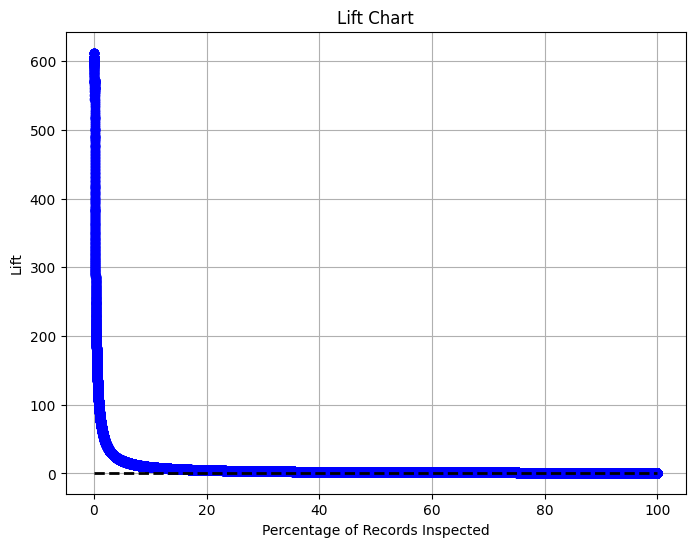

In [38]:
# Creates a Lift Chart
total_records = len(df_eval)
total_positives = df_eval['actual'].sum()
cumulative_positives = np.cumsum(df_eval['actual'])
records_inspected = np.arange(1, total_records + 1)

# Calculate lift at each point
lift = (cumulative_positives / records_inspected) / (total_positives / total_records)

# Plot the chart
plt.figure(figsize = (8, 6))
plt.plot(records_inspected / total_records * 100, lift, marker = 'o', linestyle = '-', color = 'b')

# Add the baseline for a random classifier
plt.plot([0, 100], [1, 1], 'k--', lw = 2)
plt.xlabel('Percentage of Records Inspected')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.grid(True)
plt.show()

---

### Business Summary

The objective of this project is to build a robust system for detecting credit card fraud and minimize chargebacks and financial losses. The dataset that we used contains different anonymous variables, making it harder for us to tell what factors are the main contributors in detecting fraud but we will refer to them as they are named (V1, v2, ..., v28). We used different models with similar results. The data is extremely unbalanced meaning that our algorithm correctly predicted nonfraudulent for most of the cases. In general our models had accuracy levels of over 90%.

We used 5 modeling algorithms, Logistic Regression, Decision Trees, Random Forests, Neural Network, and K-Neighbors classifier. The logistic regression model had a AUC score of 0.97 which indicates a strong performance in discriminating between fraudulent and non-fraudulent cases. The downside to this model is how low the precision is, 0.06, meaning that while it catches most fraudulent transactions, a high number of legitimate transactions are incorrectly flagged as fraudulent. It is worth noting that missing fraudulent transactions can be more expensive/detrimental to giving more warnings. Next, the decision tree model Also shows a high AUC score and recall score, similar to the logistic regression model. However, also similar to the Logistic Regression model the precission is extremely low, suggesting that it is still over-predicting fraudulent behavior. The K-neighbors classifier once again reflected high AUC (0.93) and recall (0.87) scores but the precision score is still way lower than what we were hoping for (0.33).

Our Random Forest model seems to be the best performing model by far. Its AUC (0.98) and recall (0.83) scores are both high and it also has an extremely good precision score of 0.75. This indicates that compared to the other models, it is outstandingly good at distinguishing between fraudulent and non-fraudulent cases without raising so many false alarms. Finally, the Neural Network algorithm also had great AUC (0.97), recall (0.79), and precision scores (0.72). This was our second best performing model but the Random Forest model seems to outshine it and it is less complex than the neural network algorithm. 

Some things particularly important to note are that the variables V4, V11, and V14 seem to be the top drivers in our prediction. Meaning that for future transactions focusing on these key variables will help you discern whether a transaction was fraudulent or not. If the customer has the true names of the variables it would be helpful for them to see whether these negatively or positively impact the results. For example, if location is one of them, finding certain locations where fraud is common and sending notifications to the users when they are about to pay there to confirm that it is not a fraudulent transaction could minimize fraud exposure. 